In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
NUM_TRIALS = 100000
INITIAL_VALUE = 1000
BANDIT_PROBS = [0.2, 0.4, 0.3, 0.1]

In [28]:
class Bandit:
  def __init__(self, enum, win_rate):
    self.enum = enum
    self.win_rate = win_rate
    self.win_rate_estimate = INITIAL_VALUE
    self.number_of_samples = 0

  def pull(self):
    # draw a 1 with probability of win_rate
    return np.random.random() < self.win_rate

  def update(self, new_sample):
    self.number_of_samples += 1
    self.win_rate_estimate = self.win_rate_estimate + (new_sample - self.win_rate_estimate) / self.number_of_samples

In [29]:
def optimistic_initial_values_experiment():
  bandits = [Bandit(idx, p) for idx, p in enumerate(BANDIT_PROBS)]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
      # use optimistic initial values method to select the next bandit
      j = np.argmax([bandit.win_rate_estimate for bandit in bandits])

      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
      # update rewards log
      rewards[i] = x
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)

  for bandit in bandits:
      print(f"Mean estimate of {bandit.enum}. bandit: {bandit.win_rate_estimate}")

  # print out the results
  print(f"Total reward earned: {rewards.sum()}")
  print(f"Overall win rate: {rewards.sum() / NUM_TRIALS}")

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates);
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBS));

Mean estimate of 0. bandit: 0.375
Mean estimate of 1. bandit: 0.401870187018698
Mean estimate of 2. bandit: 0.0
Mean estimate of 3. bandit: 0.0
Total reward earned: 40186.0
Overall win rate: 0.40186


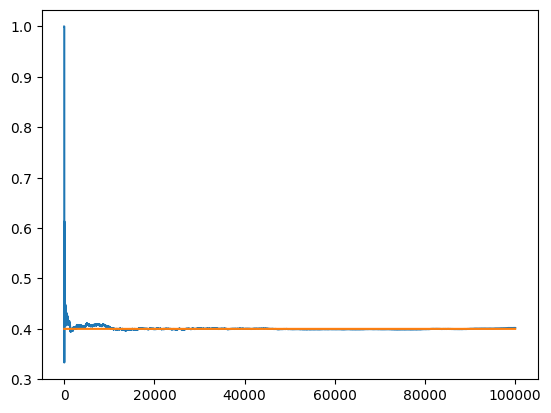

In [30]:
if __name__ == "__main__":
  # If they go anywhere below that range they are going to stop being selected.
  optimistic_initial_values_experiment()